Hello 
W ostatnich latach wzrosła koncentracja firm na zasobach ludzkich. Umiejętności i wiedza pracowników stanowią bardzo solidny fundament dla przedsiębiorstwa do budowania przewagi nad konkurencją i są niezbędnym składnikiem do dalszego rozwoju organizacji. Z tych powodów utrzymanie pracowników ramach organizacji jest kluczową kwestia do zajęcia się przez działy HR - utrata wartościowych pracowników jest bardzo kosztowna dla przedsiębiorstwa, a zatrudnianie nowych generuje wyższe koszty niż utrzymanie już tych obecnych.

Innowacje związane z podejmowaniem decyzji na podstawie analizy danych wkraczają również do świata HR. Wyobraź sobie, że pracujesz w firmie SKNS Investment Ltd. jako analityk danych, a dział HR potrzebuje analizy która ułatwi proces decyzji co do przywiązania większej uwagi do pewnych grup pracowników na podstawie kryteriów obecnych w danym poniżej zbiorze danych. Dział HR dysponuje zbiorem danych o ocenach miesięcznych pracowników z działu sprzedaży ubezpieczeń do nowych klientów o następujących kolumnach:
1. MMM.YY - Dzień wpisania oceny miesięcznej pracownika do bazy
2. Emp_ID - Identyfikator pracownika
3. Age - Wiek
4. Gender - Płeć
5. City - Identyfikator dla oddziału mieszczącego się w danym mieście
6. Education_Level - Bachelor / College / Master
7. Salary - Wynagrodzenie roczne
8. Dateofjoining - Data dołączenia do firmy
9. LastWorkingDate - Data odejścia, jeśli pracownik odszedł w danym okresie
10. Joining.Designation - pięciostopniowy poziom kwalifikacji podczas rekrutacji (1 - niski poziom, 5 - bardzo wysoki poziom)
11. Designation - aktualny poziom kwalifikacji
12. Total.Business.Value - Sumaryczna ilość sprzedanych ubezpieczeń (KPI z którego są rozliczani w perspektywie miesięcznej)
13. Quarterly.Rating - ocena roczna (1 - niski poziom, 5 bardzo wysoki poziom)
podczas
Sporządź wstępną analizę wynikającą z eksploracji dołączonego zbioru danych, z przedstawieniem kluczowych wniosków dla działu HR, którzy pracownicy mają większą a którzy mniejszą szansę na odejście z firmy w najbliższym czasie. Dołączona analiza ma zostać przygotowana przy pomocy jednego z języków programowania (akceptowane są wyłącznie Python/R/Julia) w Jupyter Notebook wraz z wykresami pokazującymi odpowiednie zauważone przez Waszą drużynę zależności.



### Streszczenie

W ostatnich latach wzrosła koncentracja firm na zasobach ludzkich. Umiejętności i wiedza pracowników stanowią bardzo solidny fundament dla przedsiębiorstwa do budowania przewagi nad konkurencją i są niezbędnym składnikiem do dalszego rozwoju organizacji. Z tych powodów utrzymanie pracowników w ramach organizacji jest kluczową kwestia do zajęcia się przez działy HR - utrata wartościowych pracowników jest bardzo kosztowna dla przedsiębiorstwa, a zatrudnianie nowych generuje wyższe koszty niż utrzymanie już tych obecnych. 

Popularnosc wykorzystania sztucznej inteligencji, metod machine learning i deep learning w działach HR rośnie. Rozwój organizacji i jej stabilnosc w duzym stopniu związana jest z rotacją pracowników, będącą ważnym czynnikiem ryzyka biznesowego. Według szacunków portalu strefabiznesu.pl w najbardziej dynamicznych sektorach, takich jak IT czy SSC/BPO rotacja w 2022 roku będzie sięgać 25 proc. To znaczy, że firmy mogą stracić nawet co czwartego pracownika.

In [2]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
from scipy import stats
import seaborn as sns

matplotlib.rcParams['figure.figsize'] = [15, 9]

pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
url = 'https://raw.githubusercontent.com/blaszczuknw/hackathon_skns/main/Attrition_dataset.csv'
df = pd.read_csv(url, sep = ";")

url_cities = 'https://raw.githubusercontent.com/blaszczuknw/hackathon_skns/main/Cities_map.csv'
df_cities = pd.read_csv(url_cities, sep = ";")

In [4]:
df[df.Dateofjoining == "August.06.12"]

,Emp_ID,MMM.YY,Age,Salary,LastWorkingDate,Designation,Total.Business.Value,Quarterly.Rating,Gender,City,Education_Level,Dateofjoining,Joining.Designation


In [5]:
df[df.LastWorkingDate.notna()]

,Emp_ID,MMM.YY,Age,Salary,LastWorkingDate,Designation,Total.Business.Value,Quarterly.Rating,Gender,City,Education_Level,Dateofjoining,Joining.Designation
2,1,01.03.2016,28,"57387,00 USD",11.03.2016,1,0,2,Male,C23,MASTER,24.12.2015,1
9,4,01.04.2017,43,"65603,00 USD",27.04.2017,2,0,1,Male,C13,Master,07.12.2016,2
12,5,01.03.2016,29,"46368,00 USD",07.03.2016,1,0,1,Male,C9,Colege,09.01.2016,1
20,8,01.11.2017,34,"70656,00 USD",15.11.2017,3,0,1,Male,C2,Colege,19.09.2017,3
27,12,01.12.2016,35,"28116,00 USD",21.12.2016,1,0,1,Male,C23,Master,29.06.2016,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19161,1803,01.07.2016,34,"52914,00 USD",20.07.2016,1,0,1,Male,C3,Master,09.05.2015,1
19167,1719,01.02.2017,46,"44497,00 USD",17.02.2017,1,311670,2,Female,C3,Colege,01.10.2015,1
19168,645,01.08.2016,28,"110445,00 USD",01.08.2016,4,0,1,Female,C8,Master,30.03.2016,2
19185,2044,01.03.2017,34,"38619,00 USD",23.03.2017,2,0,1,Male,C20,Colege,15.11.2016,2


In [6]:
df.Education_Level.unique()

array(['MASTER', 'Master', 'Colege', 'Bachelor', 'College', "Bachelor's"],
      dtype=object)

W kolumnie "Education_Level" są użyte różne nazwy na te same stopnie edukacji, wieć standaryzują to nazewnictwo

In [7]:
df = df.replace(to_replace = {'MASTER':'Master', 'Colege':'College', "Bachelor's":'Bachelor'})

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19190 entries, 0 to 19189
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Emp_ID                19190 non-null  int64 
 1   MMM.YY                19190 non-null  object
 2   Age                   19190 non-null  int64 
 3   Salary                19190 non-null  object
 4   LastWorkingDate       1628 non-null   object
 5   Designation           19190 non-null  int64 
 6   Total.Business.Value  19190 non-null  int64 
 7   Quarterly.Rating      19190 non-null  int64 
 8   Gender                19190 non-null  object
 9   City                  19190 non-null  object
 10  Education_Level       19190 non-null  object
 11  Dateofjoining         19190 non-null  object
 12  Joining.Designation   19190 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 1.9+ MB


In [9]:
df.replace( to_replace = {"Jan.":"01.","Feb.":"02.","Mar.":"03.","Apr.":"04.","May.":"05.","Jun.":"06.","Jul.":"07.","Aug.":"08.","Sep.":"09.","Oct.":"10.","Nov.":"11.","Dec.":"12.", ".20":"."}, regex = True, inplace = True)

# Zmieniam nazwy kolumn by nie zawerały znaków '.'
df.rename(columns = {"MMM.YY" : "Dateofeval", "Total.Business.Value":"TBV", "Quarterly.Rating":"Rating", "Joining.Designation":"Join_Designation"}, inplace = True)

# MMM.YY , LastWorkingDate oraz Dateofjoining mają typ object więc zmieniam je na typ date
df.Dateofeval = pd.to_datetime(df.Dateofeval, format='%d.%m.%y')
#df.Dateofjoining = pd.to_datetime(df.Dateofjoining,  format='%d.%m.%y') # W tej kolumnie sa jakies dziwne daty
df.Dateofjoining = pd.to_datetime(df.Dateofjoining, format="%d.%m.%y", errors="coerce").fillna(pd.to_datetime(df.Dateofjoining, format="%B %d%y", errors="coerce"))
df.LastWorkingDate = pd.to_datetime(df.LastWorkingDate, format='%d.%m.%y')

df

,Emp_ID,Dateofeval,Age,Salary,LastWorkingDate,Designation,TBV,Rating,Gender,City,Education_Level,Dateofjoining,Join_Designation
0,1,2016-01-01,28,"57387,00 USD",NaT,1,2381060,2,Male,C23,Master,2015-12-24,1
1,1,2016-02-01,28,"57387,00 USD",NaT,1,-665480,2,Male,C23,Master,2015-12-24,1
2,1,2016-03-01,28,"57387,00 USD",2016-03-11,1,0,2,Male,C23,Master,2015-12-24,1
3,2,2017-11-01,31,"67016,00 USD",NaT,2,0,1,Male,C7,Master,2017-11-06,2
4,2,2017-12-01,31,"67016,00 USD",NaT,2,0,1,Male,C7,Master,2017-11-06,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19185,2044,2017-03-01,34,"38619,00 USD",2017-03-23,2,0,1,Male,.,College,2016-11-15,2
19186,2651,2017-08-01,34,"62292,00 USD",2017-07-29,2,180000,1,Male,C11,Master,2016-06-27,2
19187,1864,2016-01-01,32,"85688,00 USD",NaT,3,3414220,3,Female,C29,Bachelor,2011-08-11,1
19188,2422,2016-05-01,47,"111507,00 USD",NaT,4,202400,2,Male,C4,Bachelor,2011-08-26,2


In [10]:
# Sprawdzam brakujące wartości

df.isna().sum()

Emp_ID                  0
Dateofeval              0
Age                     0
Salary                  0
LastWorkingDate     17562
Designation             0
TBV                     0
Rating                  0
Gender                  0
City                    0
Education_Level         0
Dateofjoining         217
Join_Designation        0
dtype: int64

In [11]:
# Jedyne to te od pracowników którzy nie odeszli, czyli nie ma żadnych wartości brakujących do uzupełnienia

# Zmieniam typ danych 'Salary;
df.Salary.replace(to_replace = {' USD':'',',':'.'}, regex = True, inplace = True)

In [12]:
df

,Emp_ID,Dateofeval,Age,Salary,LastWorkingDate,Designation,TBV,Rating,Gender,City,Education_Level,Dateofjoining,Join_Designation
0,1,2016-01-01,28,57387.00,NaT,1,2381060,2,Male,C23,Master,2015-12-24,1
1,1,2016-02-01,28,57387.00,NaT,1,-665480,2,Male,C23,Master,2015-12-24,1
2,1,2016-03-01,28,57387.00,2016-03-11,1,0,2,Male,C23,Master,2015-12-24,1
3,2,2017-11-01,31,67016.00,NaT,2,0,1,Male,C7,Master,2017-11-06,2
4,2,2017-12-01,31,67016.00,NaT,2,0,1,Male,C7,Master,2017-11-06,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19185,2044,2017-03-01,34,38619.00,2017-03-23,2,0,1,Male,.,College,2016-11-15,2
19186,2651,2017-08-01,34,62292.00,2017-07-29,2,180000,1,Male,C11,Master,2016-06-27,2
19187,1864,2016-01-01,32,85688.00,NaT,3,3414220,3,Female,C29,Bachelor,2011-08-11,1
19188,2422,2016-05-01,47,111507.00,NaT,4,202400,2,Male,C4,Bachelor,2011-08-26,2


In [13]:
df.loc[4,"Dateofeval"]

Timestamp('2017-12-01 00:00:00')

In [14]:
# Ile pracowników jest w zbiorze danych
len(df.Emp_ID.unique())

2381

In [15]:
# Tworzę nowy DataFrame gdzie znajduje się jeden rekord dla każdego pracownika z najpóźniejszą datą w Dateofeval - czyli najświeższa ewaluacja

latest_eval = df.sort_values("Dateofeval", ascending = False).drop_duplicates("Emp_ID")

In [16]:
latest_eval

,Emp_ID,Dateofeval,Age,Salary,LastWorkingDate,Designation,TBV,Rating,Gender,City,Education_Level,Dateofjoining,Join_Designation
2124,331,2017-12-01,35,71154.00,NaT,3,0,1,Male,C25,Master,2017-09-27,3
12511,1859,2017-12-01,35,3.9.00,NaT,1,1018850,4,Male,C22,College,2014-12-15,1
6083,906,2017-12-01,36,108997.00,NaT,3,860790,3,Female,C18,Bachelor,2016-08-30,3
8582,1265,2017-12-01,35,60358.00,NaT,2,760740,3,Male,C7,College,2015-06-24,1
7056,1054,2017-12-01,37,92940.00,NaT,3,592390,1,Female,C2,Bachelor,2017-08-09,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13295,1978,2016-01-01,41,12553.00,2016-01-19,1,0,1,Male,C17,College,2015-12-09,1
13278,1976,2016-01-01,31,51181.00,2016-01-23,2,0,1,Female,.,Master,2015-07-31,2
5834,872,2016-01-01,32,19791.00,2016-01-01,1,0,1,Male,C28,Master,2015-10-16,1
5870,877,2016-01-01,32,94770.00,2016-01-13,2,0,1,Male,C21,College,2015-08-08,2


In [17]:
len(latest_eval)

2381

In [18]:
# Tworzę nową kolumnę z ilością przepracowanych dni - na razie są tam tylko dane dla pracowników którzy opuścili firmę
latest_eval.loc[:,"WorkDays"] = latest_eval.LastWorkingDate - latest_eval.Dateofjoining

In [19]:
latest_eval = latest_eval.sort_index()
# Dodaję nową kolumnę - 1 jeśli pracownik odszedł, 0 jeśli nie odszedł
latest_eval.loc[:,"IfLeft"] = latest_eval.LastWorkingDate.notna().astype(int)

In [20]:
# Wpisuję w WorkDays wartości dla pracowników którzy nie opuścili firmy (wpisuje tam czas od dolączenia do dnia ostatniej ewaluacji)
latest_eval.WorkDays.fillna(latest_eval.loc[:,"Dateofeval"] - latest_eval.loc[:,"Dateofjoining"], inplace = True)
latest_eval

,Emp_ID,Dateofeval,Age,Salary,LastWorkingDate,Designation,TBV,Rating,Gender,City,Education_Level,Dateofjoining,Join_Designation,WorkDays,IfLeft
2,1,2016-03-01,28,57387.00,2016-03-11,1,0,2,Male,C23,Master,2015-12-24,1,78 days,1
4,2,2017-12-01,31,67016.00,NaT,2,0,1,Male,C7,Master,2017-11-06,2,25 days,0
9,4,2017-04-01,43,65603.00,2017-04-27,2,0,1,Male,C13,Master,2016-12-07,2,141 days,1
12,5,2016-03-01,29,46368.00,2016-03-07,1,0,1,Male,C9,College,2016-01-09,1,58 days,1
17,6,2017-12-01,31,78728.00,NaT,3,0,2,Female,C11,Bachelor,2017-07-31,3,123 days,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19103,2788,2017-12-01,30,70254.00,NaT,2,411480,2,Male,C27,Master,2017-06-08,2,176 days,0
19107,2713,2016-10-01,32,23582.00,2016-10-04,2,0,1,Female,C9,Master,2016-06-30,2,96 days,1
19134,2544,2016-10-01,32,67667.00,2016-10-22,2,0,1,Male,C22,College,2016-07-28,2,86 days,1
19167,1719,2017-02-01,46,44497.00,2017-02-17,1,311670,2,Female,C3,College,2015-10-01,1,505 days,1


In [21]:
# Zmieniam typ danych z timedelta na int
latest_eval.WorkDays = latest_eval.WorkDays.dt.days

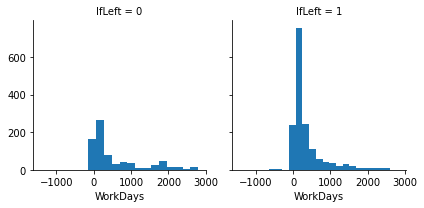

In [22]:
f = sns.FacetGrid(latest_eval, col = "IfLeft")
f.map(plt.hist, "WorkDays", bins = 20)

In [23]:
# Tworzę nową kolumnę z sumą TBV ze wszystkich miesięcy w których pracownik był ewaluowane

valuesum = df.groupby("Emp_ID")["TBV"].sum().reset_index()
valuesum.rename(columns = {"TBV" : "ValueSum"}, inplace = True)
latest_eval = latest_eval.merge(valuesum, how = "left", on = "Emp_ID")

In [24]:
latest_eval

,Emp_ID,Dateofeval,Age,Salary,LastWorkingDate,Designation,TBV,Rating,Gender,City,Education_Level,Dateofjoining,Join_Designation,WorkDays,IfLeft,ValueSum
0,1,2016-03-01,28,57387.00,2016-03-11,1,0,2,Male,C23,Master,2015-12-24,1,78.0,1,1715580
1,2,2017-12-01,31,67016.00,NaT,2,0,1,Male,C7,Master,2017-11-06,2,25.0,0,0
2,4,2017-04-01,43,65603.00,2017-04-27,2,0,1,Male,C13,Master,2016-12-07,2,141.0,1,350000
3,5,2016-03-01,29,46368.00,2016-03-07,1,0,1,Male,C9,College,2016-01-09,1,58.0,1,120360
4,6,2017-12-01,31,78728.00,NaT,3,0,2,Female,C11,Bachelor,2017-07-31,3,123.0,0,1265000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2788,2017-12-01,30,70254.00,NaT,2,411480,2,Male,C27,Master,2017-06-08,2,176.0,0,2498660
2377,2713,2016-10-01,32,23582.00,2016-10-04,2,0,1,Female,C9,Master,2016-06-30,2,96.0,1,300000
2378,2544,2016-10-01,32,67667.00,2016-10-22,2,0,1,Male,C22,College,2016-07-28,2,86.0,1,0
2379,1719,2017-02-01,46,44497.00,2017-02-17,1,311670,2,Female,C3,College,2015-10-01,1,505.0,1,4246360


In [25]:
korelacja = latest_eval.corr()

In [26]:
korelacja

,Emp_ID,Age,Designation,TBV,Rating,Join_Designation,WorkDays,IfLeft,ValueSum
Emp_ID,1.000000,-0.004458,-0.013897,0.028629,0.012889,-0.023126,0.041051,0.029269,0.015086
Age,-0.004458,1.000000,0.252577,0.095944,0.150205,0.081523,0.313961,-0.078883,0.262971
Designation,-0.013897,0.252577,1.000000,0.228364,0.120442,0.712459,0.335865,-0.225585,0.381710
TBV,0.028629,0.095944,0.228364,1.000000,0.453893,0.025054,0.269113,-0.289008,0.560825
Rating,0.012889,0.150205,0.120442,0.453893,1.000000,-0.063404,0.336413,-0.510532,0.544727
Join_Designation,-0.023126,0.081523,0.712459,0.025054,-0.063404,1.000000,-0.210577,-0.127773,-0.121743
WorkDays,0.041051,0.313961,0.335865,0.269113,0.336413,-0.210577,1.000000,-0.168116,0.668972
IfLeft,0.029269,-0.078883,-0.225585,-0.289008,-0.510532,-0.127773,-0.168116,1.000000,-0.379551
ValueSum,0.015086,0.262971,0.381710,0.560825,0.544727,-0.121743,0.668972,-0.379551,1.000000


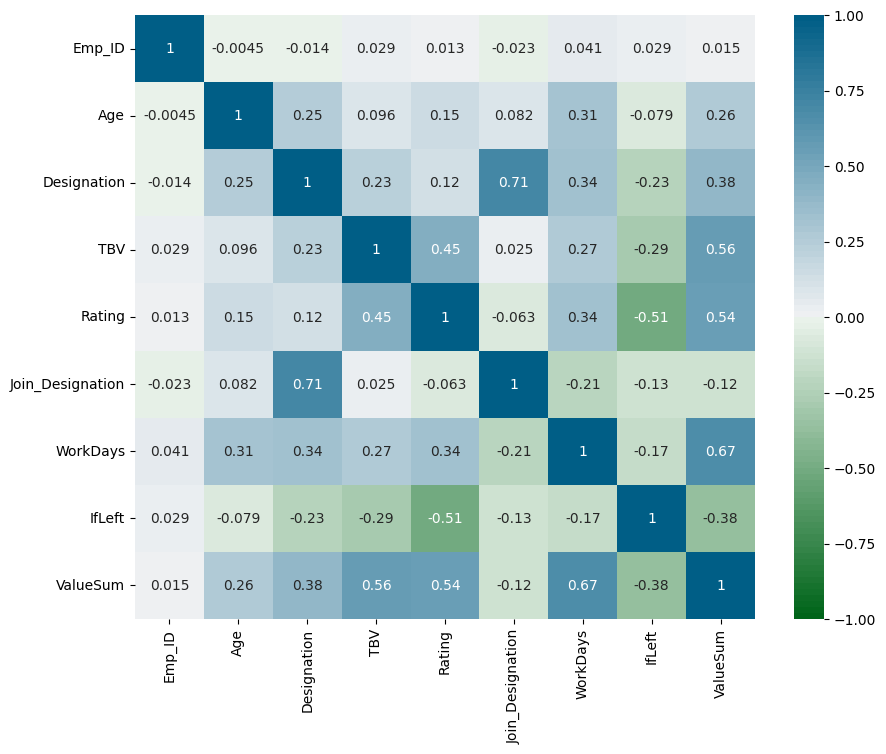

In [38]:
plt.figure(figsize=(10, 8), dpi=100)
sns.heatmap(korelacja, annot=True, vmin = -1, vmax = 1, cmap = sns.diverging_palette(140, 230, s=150, l=35, n=100))
plt.show()

In [28]:
#### Istnieje silna ujemna korelacja między odejściem pracownika z firmy, a jego oceną roczną. Pracownicy, którzy odeszli 
# częściej mieli niższy rating. 

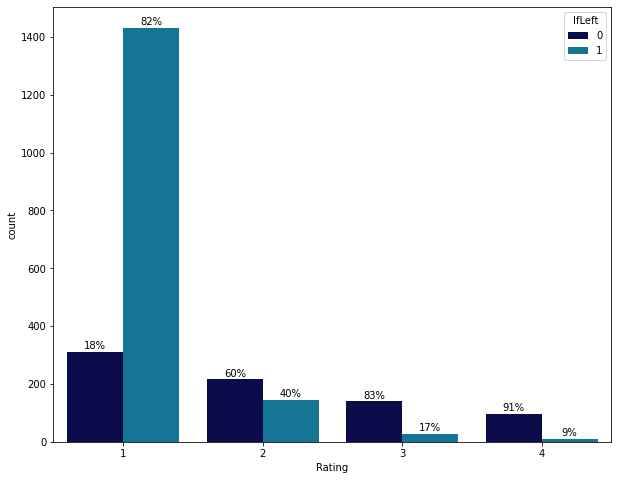

In [29]:
plt.figure(figsize=(10,8))
ax=sns.countplot(x="Rating", hue="IfLeft", data=latest_eval, palette='ocean')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
        height_l = left.get_height()
        height_r = right.get_height()
        total = height_l + height_r
        ax.text(left.get_x() + left.get_width()/2., height_l + 10, '{0:.0%}'.format(height_l/total), ha="center")
        ax.text(right.get_x() + right.get_width()/2., height_r + 10, '{0:.0%}'.format(height_r/total), ha="center")
plt.show()

In [30]:
# Wśród pracowników z najniższą oceną, równą 1, aż 81% odeszło z firmy.

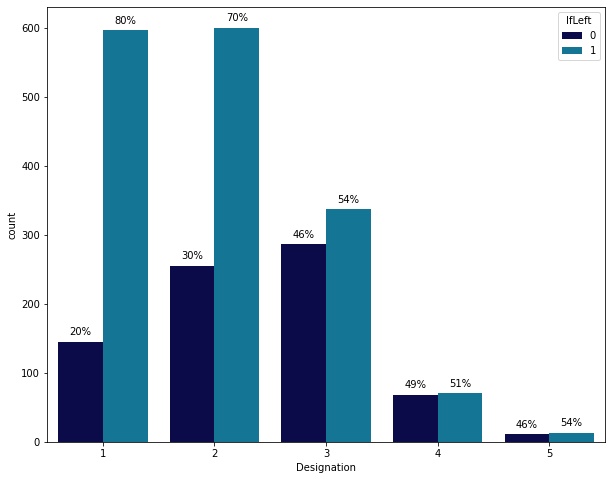

In [31]:
plt.figure(figsize=(10,8))
ax=sns.countplot(x="Designation", hue="IfLeft", data=latest_eval, palette='ocean')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
        height_l = left.get_height()
        height_r = right.get_height()
        total = height_l + height_r
        ax.text(left.get_x() + left.get_width()/2., height_l + 10, '{0:.0%}'.format(height_l/total), ha="center")
        ax.text(right.get_x() + right.get_width()/2., height_r + 10, '{0:.0%}'.format(height_r/total), ha="center")
plt.show()

In [32]:
# Występuję równiez ujemna korelacja między poziomem klasyfikacji pracowników, a ich odejściem z firmy. Pracownicy o niższych klasyfikacjach 
# częściej odchodzą z firmy. Wśród pracowników o najniższych klasyfikacjach, aż 80% odeszło z firmy.

<AxesSubplot:xlabel='Join_Designation', ylabel='count'>

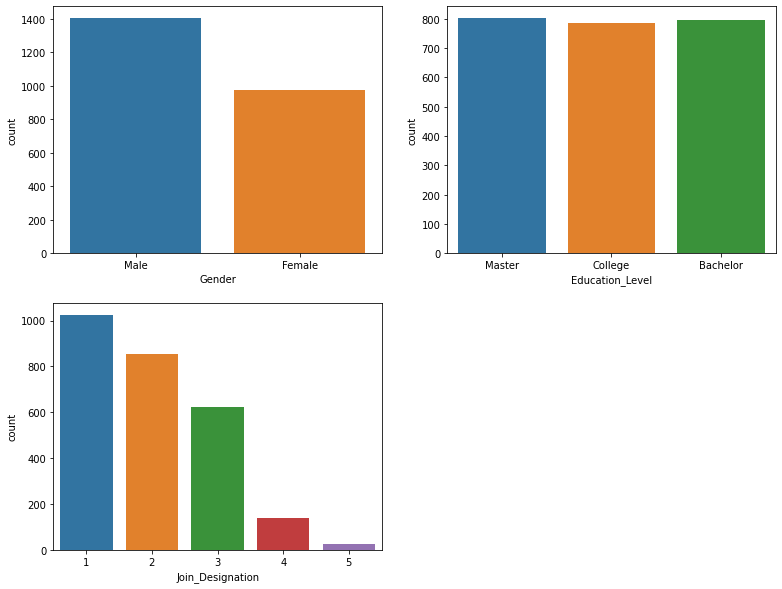

In [33]:
plt.subplots(figsize=(20,10))

plt.subplot(231)
sns.countplot(x = 'Gender', data = latest_eval)

plt.subplot(232)
sns.countplot(x = 'Education_Level', data = latest_eval)

plt.subplot(234)
sns.countplot(x = 'Designation', data = latest_eval)

plt.subplot(234)
sns.countplot(x = 'Join_Designation', data = latest_eval)

<AxesSubplot:xlabel='IfLeft', ylabel='count'>

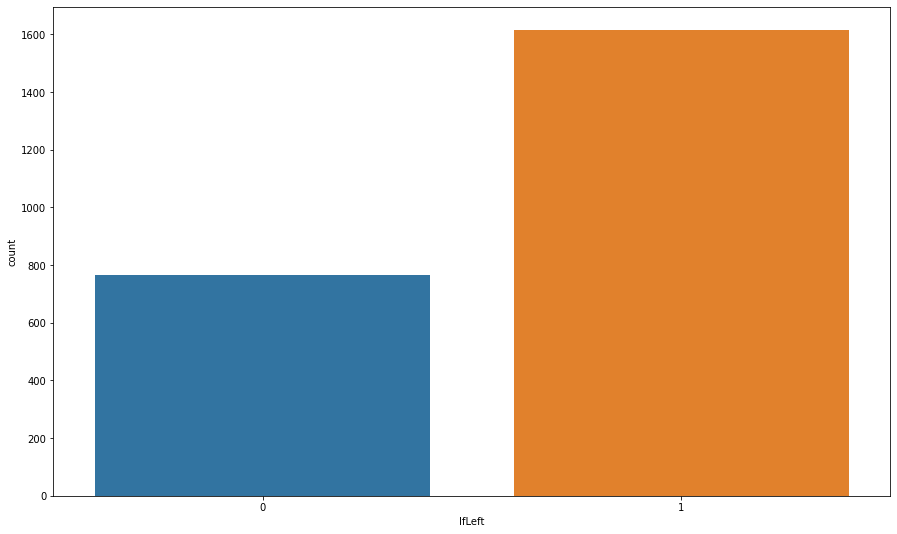

In [34]:
sns.countplot(x = 'IfLeft', data = latest_eval)   # próba jest lekko niezbilansowana. Przeważają pracownicy, którzy odeszli z firmy.

<function matplotlib.pyplot.show(close=None, block=None)>

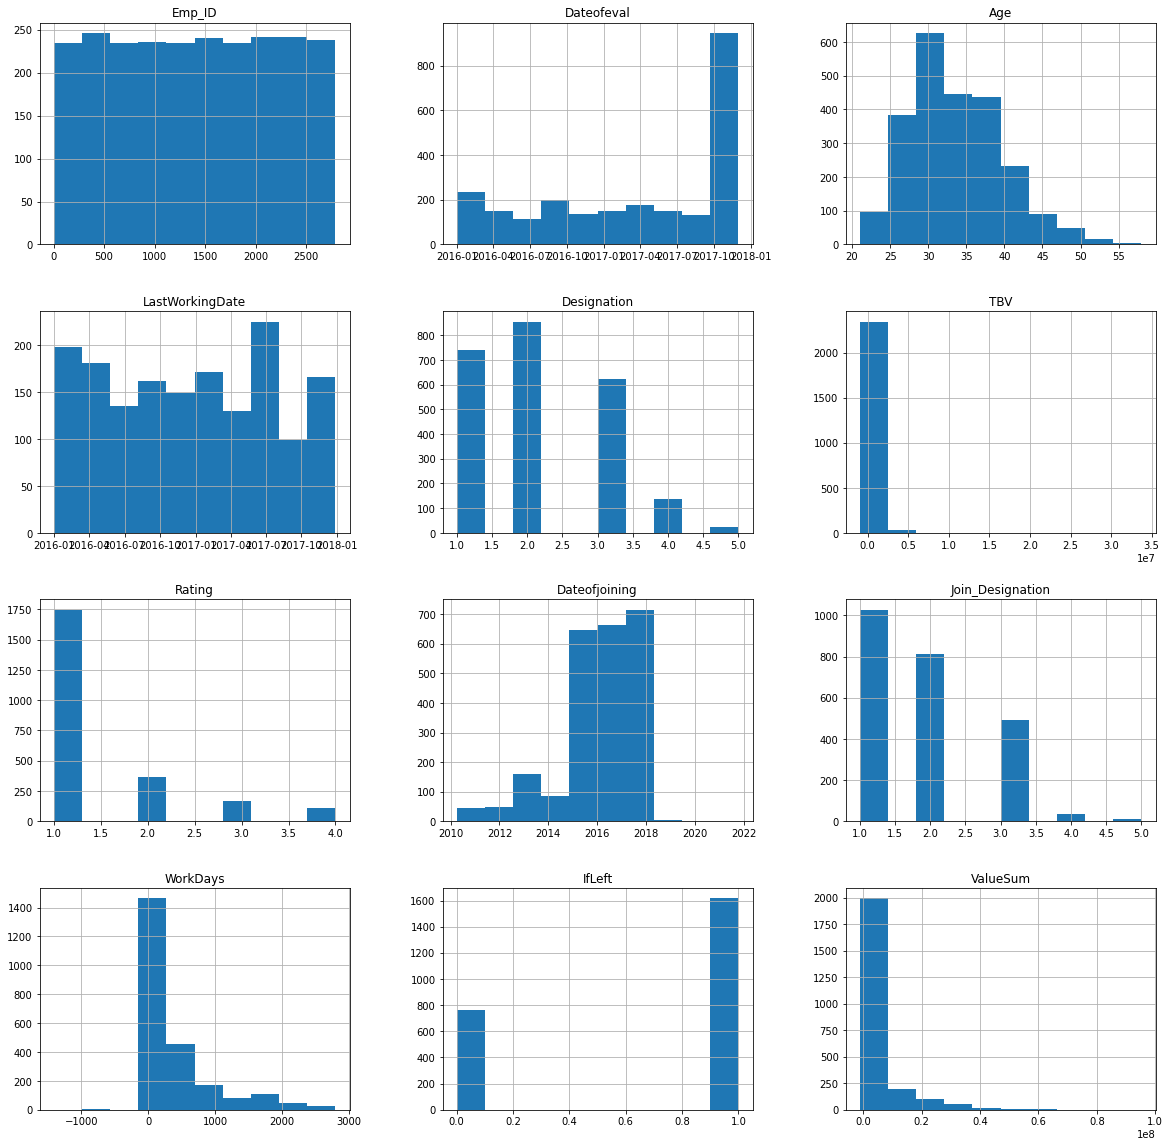

In [35]:
latest_eval.hist(figsize=(20,20))
plt.show

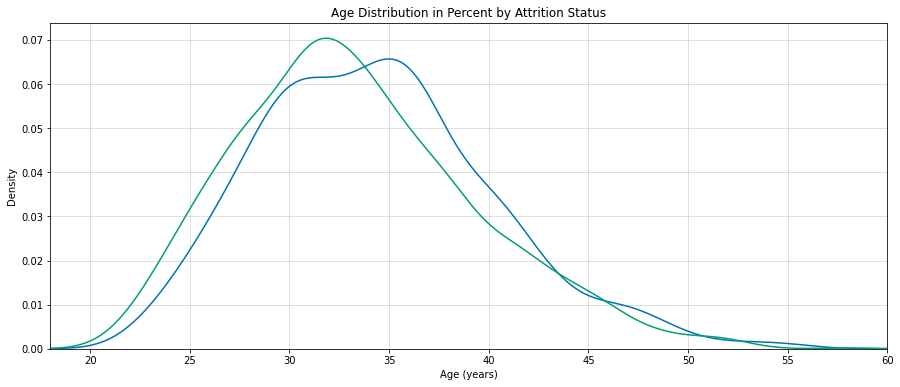

In [36]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(latest_eval.loc[latest_eval['IfLeft'] == 0, 'Age'], label = 'Active Employee')
sns.kdeplot(latest_eval.loc[latest_eval['IfLeft'] == 1, 'Age'], label = 'Left the company')
plt.xlim(left=18, right=60)
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.title('Age Distribution in Percent by Attrition Status');